In [2]:
import pickle,glob,re
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [3]:
%matplotlib inline

In [4]:
listeMSP=sorted(glob.glob("/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/*X-paradigmes.csv"))
listeOMP=sorted(glob.glob("/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/*-Morphomes-paradigmes.csv"))

In [5]:
listeMSP

['/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-00-T10000-F3663-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-01-T20000-F5816-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-02-T30000-F7497-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-03-T40000-F8900-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-04-T50000-F10082-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-05-T60000-F11252-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-06-T70000-F12207-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-07-T80000-F13155-X-paradigmes.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/

In [6]:
def tiragesNom(nom,listeTirages):
    result=[tirage for tirage in listeTirages if nom in tirage]
    return sorted(result)

In [7]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_palette("husl")

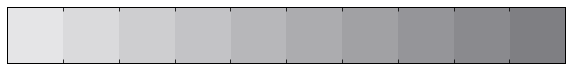

In [8]:
grayScalePalette=sns.cubehelix_palette(10, hue=0.05, rot=0, light=0.9, dark=0.5)
sns.palplot(grayScalePalette)

In [9]:
def lireEchantillon(nom):
    df=pd.read_csv(nom,sep=";",index_col="lexeme")
    df.drop(labels="Unnamed: 0",axis=1,inplace=True)
    return df

In [10]:
bounds = np.array([0, 1, 3, 10, 30, 100, 300, 1000])
norm = mplt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

In [11]:
freqSortedCases=[u'pi3S', u'inf', u'ppMS', u'pi1S', u'ii3S', u'pi2S', u'pi2P', u'ai3S', u'pi3P', u'ppFS', 
                 u'ii1S', u'pP', u'ii3P', u'ppMP', u'fi3S', u'pc3S', u'pi1P', u'ps3S', u'fi1S', u'pc1S', 
                 u'ppFP', u'pI2P', u'ai1S', u'pI2S', u'ai3P', u'fi2S', u'ii1P', u'fi2P', u'ii2P', u'fi3P', 
                 u'is3S', u'fi1P', u'pc3P', u'pc2P', u'ps2S', u'pI1P', u'ps3P', u'pc2S', u'pc1P', u'ai1P', 
                 u'ii2S', u'ps2P', u'is3P', u'ai2S', u'ps1P', u'is1S', u'ai2P', u'ps1S', u'is1P', u'is2S', 
                 u'is2P']

In [12]:
def getTokens(name):
    m=re.search(ur"\d+-T(\d+)-F\d+",name)
    if m:
        return int(m.group(1))
    else:
        print "no Tokens"
        return None

In [13]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

In [14]:
def setSeries(df,nbCells=51):
    for i in range(nbCells):
        if not i+1 in df.index:
            df[i+1]=0
    return df.sort_index()

In [15]:
def getCoforms(df,nbCells=51):
    dfCoforms=df.apply(lambda x: x.count(), axis=1)
    mean=dfCoforms.mean()
    dist=setSeries(dfCoforms.groupby(dfCoforms).count(),nbCells=nbCells)
    return mean,dist

In [16]:
etapes=[2000000,8000000,30000000,130000000]

In [17]:
dictIsolatedCellForms={}
dictCoforms={}
dictDist={}
for MSP in listeMSP[:]:
    df=lireEchantillon(MSP)
    tokens=getTokens(MSP)
    dictIsolatedCellForms[tokens]=len(df)-len(df.dropna(thresh=2))
    mean,dist=getCoforms(df)
    dist.name="%dM tokens"%(tokens/1000000)
    dictCoforms[tokens]=mean
    dictDist[tokens]=dist
print "dictDist"

dictDist


In [93]:
dictDist

{10000: 1     660
 2     215
 3     125
 4      79
 5      52
 6      33
 7      35
 8      19
 9      12
 10     11
 11      6
 12      6
 13      6
 14      5
 15      4
 16      3
 17      2
 18      1
 19      2
 20      1
 21      3
 22      1
 23      0
 24      2
 25      0
 26      1
 27      1
 28      1
 29      1
 30      2
 31      0
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      0
 47      0
 48      0
 49      0
 50      0
 51      0
 Name: 0M tokens, dtype: int64, 20000: 1     808
 2     317
 3     159
 4     105
 5      99
 6      60
 7      45
 8      39
 9      25
 10     22
 11     13
 12     12
 13     12
 14      3
 15      9
 16      8
 17      3
 18      5
 19      2
 20      5
 21      1
 22      2
 23      3
 24      1
 25      1
 26      3
 27      0
 28      1
 29      0
 30      0
 31      4
 32      1
 33      0
 34      0
 35      0
 36      

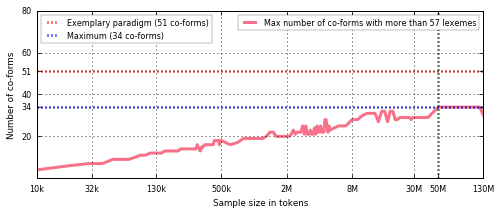

In [88]:
ICmax={}
for d in sorted(dictDist):
    s=dictDist[d]
#    print d
#    print s[s>=57].index.max()
    ICmax[d]=s[s>=57].index.max()
ax=pd.Series(ICmax).plot(figsize=(8,3),linewidth=3)
ax.set_xscale("log")
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of co-forms")#,fontsize=16)
ax.set_xlim(10000,130000000)
ax.set_ylim(0,75)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(51,linestyle=":",linewidth=3,c="red",label="Exemplary paradigm")
ax.axhline(34,linestyle=":",linewidth=3,label="Maximum")
ax.axvline(50000000,linestyle=":",linewidth=3,c="green")
plt.yticks([20,34,40,51,60,80])
handles, labels = ax.get_legend_handles_labels()
labels=["Max number of co-forms with more than 57 lexemes", "Exemplary paradigm (51 co-forms)"]
ax.legend(handles, labels,loc=1)
handles, labels = ax.get_legend_handles_labels()
legend1=ax.legend([handles[0]], ["Max number of co-forms with more than 57 lexemes"], loc=1,ncol=2)
ax.legend(handles[1:],["Exemplary paradigm (51 co-forms)","Maximum (34 co-forms)"],loc=2)
ax.add_artist(legend1)
rows=[10000,32000,125000,500000,2000000,8000000,30000000,50000000,130000000]
plt.xticks(rows)
plt.grid()
plt.minorticks_off()
plt.savefig("MaxCoforms57IC.png",dpi=300, bbox_inches="tight")

In [19]:
ICmax

{10000: 4,
 20000: 6,
 30000: 7,
 40000: 7,
 50000: 9,
 60000: 9,
 70000: 9,
 80000: 10,
 90000: 11,
 100000: 11,
 110000: 12,
 120000: 12,
 130000: 12,
 140000: 12,
 150000: 13,
 160000: 13,
 170000: 13,
 180000: 13,
 190000: 13,
 200000: 13,
 210000: 14,
 220000: 14,
 230000: 14,
 240000: 14,
 250000: 14,
 260000: 14,
 270000: 14,
 280000: 14,
 290000: 14,
 300000: 16,
 310000: 14,
 320000: 13,
 330000: 15,
 340000: 15,
 350000: 16,
 360000: 16,
 370000: 16,
 380000: 16,
 390000: 16,
 400000: 16,
 410000: 16,
 420000: 16,
 430000: 18,
 440000: 18,
 450000: 18,
 460000: 18,
 470000: 18,
 480000: 16,
 490000: 18,
 500000: 18,
 600000: 16,
 700000: 17,
 800000: 19,
 900000: 19,
 1000000: 19,
 1100000: 19,
 1200000: 19,
 1300000: 20,
 1400000: 22,
 1500000: 22,
 1600000: 20,
 1700000: 20,
 1800000: 20,
 1900000: 20,
 2000000: 20,
 2100000: 20,
 2200000: 21,
 2300000: 23,
 2400000: 21,
 2500000: 22,
 2600000: 22,
 2700000: 22,
 2800000: 25,
 2900000: 21,
 3000000: 25,
 3100000: 21,
 32000

In [20]:
dfIC=pd.concat(dictDist,axis=1)
dfIC

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,...,40000000,50000000,60000000,70000000,80000000,90000000,100000000,110000000,120000000,130000000
1,660,808,827,882,914,934,932,938,935,940,...,454,455,453,456,460,462,464,463,462,461
2,215,317,392,400,429,458,471,492,513,508,...,333,332,329,326,323,324,325,324,325,324
3,125,159,204,246,251,251,274,279,289,319,...,274,272,274,278,280,277,276,277,275,278
4,79,105,119,157,167,180,199,217,207,212,...,236,241,240,239,239,237,238,235,235,234
5,52,99,84,108,122,139,160,166,172,186,...,251,249,250,248,245,248,245,248,248,248
6,33,60,96,91,90,99,97,114,119,118,...,217,211,216,215,215,216,216,212,212,213
7,35,45,68,78,84,88,94,95,113,118,...,223,225,220,221,222,219,218,221,221,220
8,19,39,40,56,80,91,70,74,81,84,...,214,216,216,213,215,212,210,208,204,203
9,12,25,48,53,61,61,71,70,76,78,...,235,229,225,226,221,223,224,226,229,230
10,11,22,23,30,33,45,53,58,58,63,...,231,229,224,225,225,220,222,217,218,215


In [21]:
listDist=[dictDist[etape] for etape in etapes]

In [22]:
dfMSP = pd.concat(listDist, axis=1, keys=[s.name for s in listDist])

In [23]:
dfMSP

,2M tokens,8M tokens,30M tokens,130M tokens
1,586,466,455,461
2,401,348,340,324
3,319,284,275,278
4,334,260,236,234
5,286,259,259,248
6,293,257,215,213
7,263,237,224,220
8,236,223,219,203
9,196,248,235,230
10,198,244,232,215


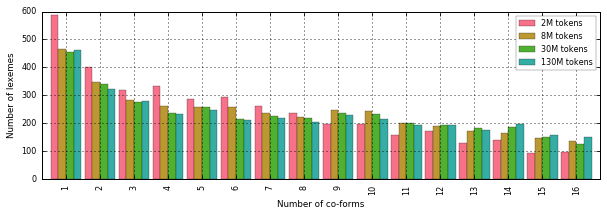

In [24]:
ax=dfMSP[:16].plot(kind="bar",figsize=(10,3),width=.9)
#ax.set_ylim(0,100)
#handles, labels = ax.get_legend_handles_labels()
#labels=["lexemes"]
#ax.legend(handles, labels)
plt.xlabel('Number of co-forms')
plt.ylabel('Number of lexemes')
#plt.title('%dM tokens'%(etape/1000000))
plt.grid()
#plt.show()
plt.savefig("DistNbCoforms-Head.png",dpi=300, bbox_inches="tight")

In [92]:
dfMSP[35:]

,2M tokens,8M tokens,30M tokens,130M tokens
36,15,35,39,40
37,16,38,39,42
38,13,20,39,46
39,13,18,33,45
40,12,24,30,31
41,6,16,18,26
42,9,10,15,14
43,4,12,14,16
44,5,7,14,15
45,2,6,7,8


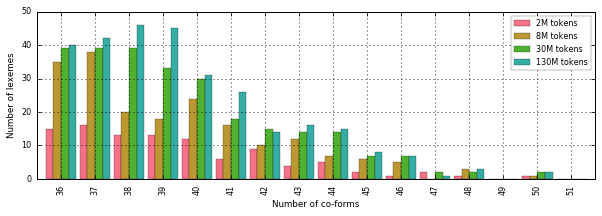

In [25]:
ax=dfMSP[35:].plot(kind="bar",figsize=(10,3),width=.9)
#ax.set_ylim(0,100)
#handles, labels = ax.get_legend_handles_labels()
#labels=["lexemes"]
#ax.legend(handles, labels)
plt.xlabel('Number of co-forms')
plt.ylabel('Number of lexemes')
#plt.title('%dM tokens'%(etape/1000000))
plt.grid()
#plt.show()
plt.savefig("DistNbCoforms-Tail.png",dpi=300, bbox_inches="tight")

In [26]:
for etape in etapes:
    dfTemp=dictDist[etape]
    print etape,dfTemp[dfTemp.index>=48]

2000000 48    1
49    0
50    1
51    0
Name: 2M tokens, dtype: int64
8000000 48    3
49    0
50    1
51    0
Name: 8M tokens, dtype: int64
30000000 48    2
49    0
50    2
51    0
Name: 30M tokens, dtype: int64
130000000 48    3
49    0
50    2
51    0
Name: 130M tokens, dtype: int64


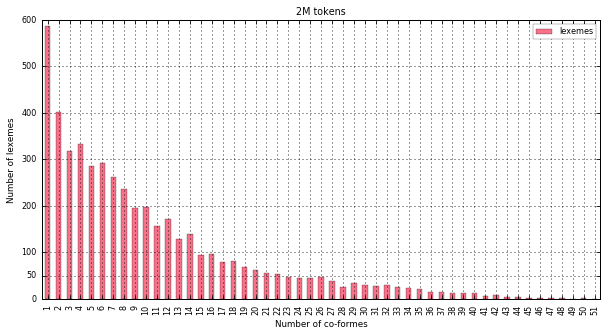

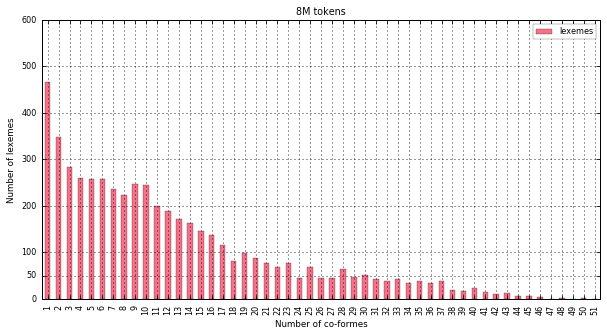

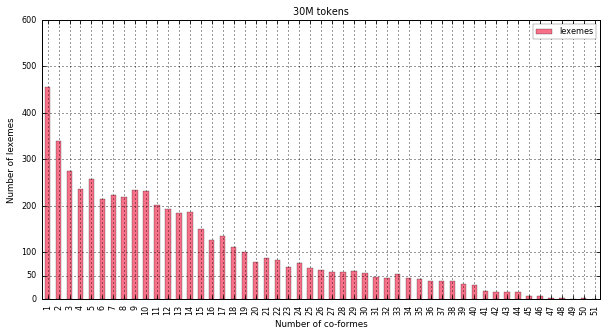

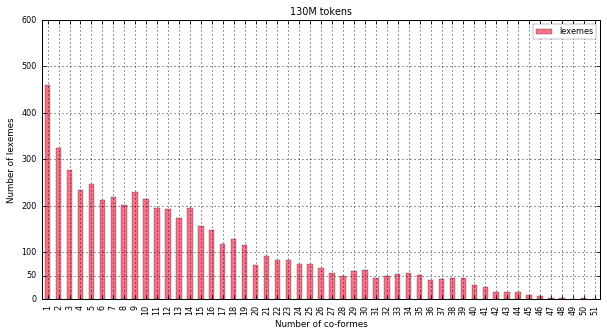

In [27]:
for etape in etapes:
    ax=dictDist[etape].plot(kind="bar",figsize=(10,5),label="Lexemes by number of co-forms")
    ax.set_ylim(0,600)
    plt.yticks(list(plt.yticks()[0]) + [50])
    handles, labels = ax.get_legend_handles_labels()
    labels=["lexemes"]
    ax.legend(handles, labels)
    plt.xlabel('Number of co-formes')
    plt.ylabel('Number of lexemes')
    plt.title('%dM tokens'%(etape/1000000))
    plt.grid()
    plt.show()

In [28]:
dfIsolatedCelleForms=pd.Series(data=dictIsolatedCellForms)
dfIsolatedCelleForms.min()

452

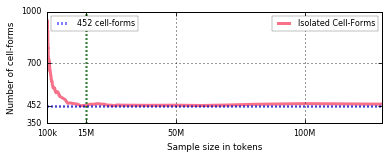

In [89]:
ax=dfIsolatedCelleForms.plot(figsize=(6,2),linewidth=3)
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of cell-forms")#,fontsize=16)
ax.set_xlim(100000,130000000)
plt.yticks([350,700,1000])
plt.xticks([100000,15000000,50000000,100000000])
ax.set_ylim(350,1000)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(452,linestyle=":",linewidth=3,label="Minimum")
ax.axvline(15000000,linestyle=":",linewidth=3,c="green")
plt.yticks(list(plt.yticks()[0]) + [452])
#handles, labels = ax.get_legend_handles_labels()
#labels=["Isolated Cell-Forms", "Minimum"]
#ax.legend(handles, labels)
handles, labels = ax.get_legend_handles_labels()
legend1=ax.legend([handles[0]], ["Isolated Cell-Forms"], loc=1,ncol=2)
ax.legend(handles[1:],["452 cell-forms"],loc=2)
ax.add_artist(legend1)
plt.grid()
plt.savefig("Hapax.png",dpi=300, bbox_inches="tight")

In [46]:
dictIsolatedCellFormsOMP={}
dictCoformsOMP={}
dictDistOMP={}
for OMP in listeOMP[:]:
    df=lireEchantillon(OMP)
    tokens=getTokens(OMP)
    dictIsolatedCellFormsOMP[tokens]=len(df)-len(df.dropna(thresh=2))
    mean,dist=getCoforms(df,nbCells=34)
    dist.name="%dM tokens"%(tokens/1000000)
    dictCoformsOMP[tokens]=mean
    dictDistOMP[tokens]=dist

In [47]:
dist

1     488
2     414
3     346
4     309
5     312
6     249
7     304
8     306
9     294
10    233
11    224
12    193
13    164
14    156
15    141
16    100
17     87
18    121
19     86
20     78
21     80
22     88
23     85
24     82
25     73
26     83
27     48
28     45
29     29
30     15
31      5
32      3
33      1
34      1
Name: 10M tokens, dtype: int64

In [48]:
listDistOMP=[dictDistOMP[etape] for etape in etapes]

In [49]:
listDistOMP

[1     621
 2     448
 3     404
 4     359
 5     368
 6     322
 7     302
 8     259
 9     241
 10    220
 11    171
 12    152
 13    115
 14    117
 15     85
 16     94
 17     74
 18     67
 19     71
 20     56
 21     60
 22     44
 23     40
 24     46
 25     30
 26     28
 27     22
 28     11
 29      8
 30      2
 31      2
 32      1
 33      1
 34      0
 Name: 2M tokens, dtype: int64, 1     489
 2     416
 3     350
 4     320
 5     310
 6     258
 7     305
 8     301
 9     301
 10    229
 11    224
 12    187
 13    156
 14    162
 15    122
 16    109
 17     95
 18    106
 19     91
 20     64
 21     76
 22     87
 23     82
 24     77
 25     66
 26     78
 27     49
 28     41
 29     29
 30     11
 31      5
 32      3
 33      1
 34      1
 Name: 8M tokens, dtype: int64, 1     476
 2     415
 3     342
 4     270
 5     289
 6     280
 7     257
 8     281
 9     284
 10    252
 11    221
 12    195
 13    192
 14    156
 15    153
 16    109
 17    119
 18

In [50]:
dfOMP = pd.concat(listDistOMP, axis=1, keys=[s.name for s in listDistOMP])

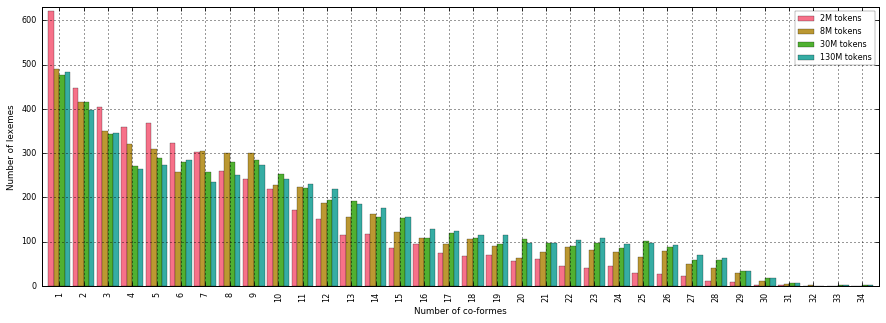

In [51]:
ax=dfOMP.plot(kind="bar",figsize=(15,5),width=.9)
ax.set_ylim(0,630)
#handles, labels = ax.get_legend_handles_labels()
#labels=["lexemes"]
#ax.legend(handles, labels)
plt.xlabel('Number of co-formes')
plt.ylabel('Number of lexemes')
#plt.title('%dM tokens'%(etape/1000000))
plt.grid()
plt.show()

In [52]:
for etape in etapes:
    dfTemp=dictDistOMP[etape]
    print etape,dfTemp[dfTemp.index>=32]

2000000 32    1
33    1
34    0
Name: 2M tokens, dtype: int64
8000000 32    3
33    1
34    1
Name: 8M tokens, dtype: int64
30000000 32    1
33    2
34    2
Name: 30M tokens, dtype: int64
130000000 32    1
33    2
34    2
Name: 130M tokens, dtype: int64


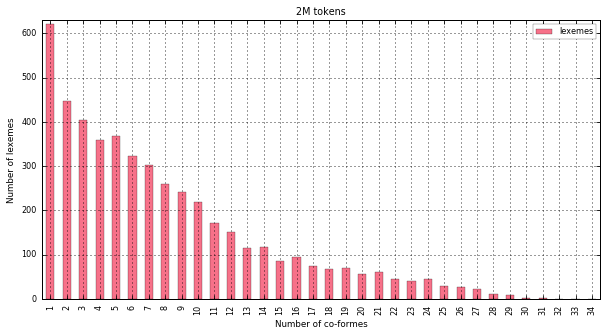

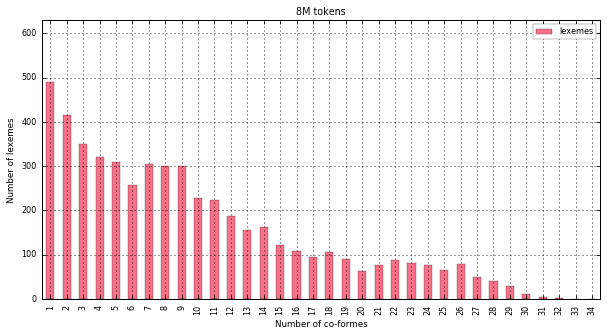

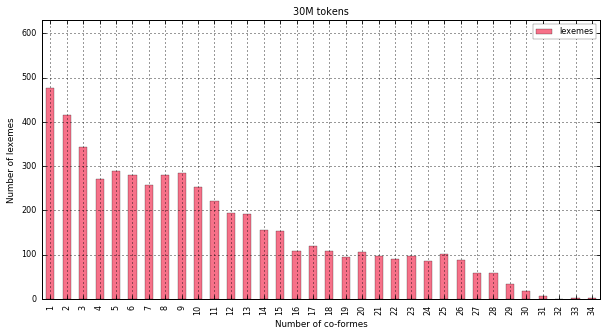

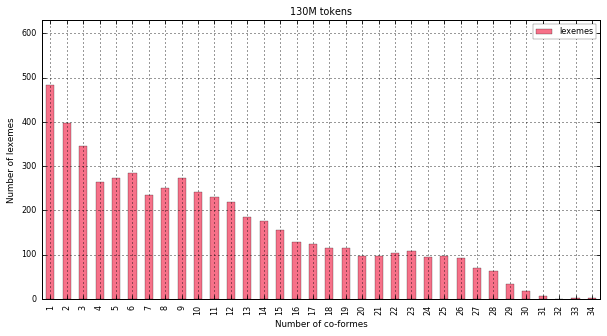

In [53]:
for etape in etapes:
    ax=dictDistOMP[etape].plot(kind="bar",figsize=(10,5),label="Lexemes by number of co-forms")
    ax.set_ylim(0,630)
    handles, labels = ax.get_legend_handles_labels()
    labels=["lexemes"]
    ax.legend(handles, labels)
    plt.xlabel('Number of co-formes')
    plt.ylabel('Number of lexemes')
    plt.title('%dM tokens'%(etape/1000000))
    plt.grid()
    plt.show()

In [54]:
dfIsolatedCelleFormsOMP=pd.Series(data=dictIsolatedCellFormsOMP)
dfIsolatedCelleFormsOMP.min()

474

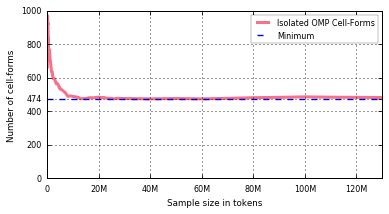

In [55]:
ax=dfIsolatedCelleFormsOMP.plot(figsize=(6,3),linewidth=3)
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of cell-forms")#,fontsize=16)
ax.set_ylim(0,1000)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(474,linestyle="--",label="Minimum")
plt.yticks(list(plt.yticks()[0]) + [474])
handles, labels = ax.get_legend_handles_labels()
labels=["Isolated OMP Cell-Forms", "Minimum"]
ax.legend(handles, labels)
plt.grid()
plt.savefig("HapaxOMP.png",dpi=300, bbox_inches="tight")

In [56]:
dfCoforms=pd.Series(data=dictCoforms)
dfCoforms

10000         2.840186
20000         3.283051
30000         3.666667
40000         3.896582
50000         4.115652
60000         4.325635
70000         4.494287
80000         4.643110
90000         4.794188
100000        4.921088
110000        5.028691
120000        5.142948
130000        5.262667
140000        5.375765
150000        5.463568
160000        5.553751
170000        5.652936
180000        5.732143
190000        5.816885
200000        5.872994
210000        5.954583
220000        6.027295
230000        6.086719
240000        6.148568
250000        6.205300
260000        6.283665
270000        6.335263
280000        6.401047
290000        6.461899
300000        6.514205
               ...    
11000000     12.508658
12000000     12.585978
13000000     12.661352
14000000     12.717643
15000000     12.767702
16000000     12.807147
17000000     12.844381
18000000     12.876958
19000000     12.904807
20000000     12.930522
21000000     12.950339
22000000     12.973298
23000000   

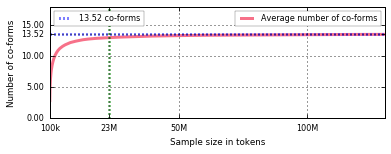

In [91]:
ax=dfCoforms.plot(figsize=(6,2),linewidth=3)
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of co-forms")#,fontsize=16)
ax.set_ylim(0,18)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(13.52,linestyle=":",linewidth=3,label="Minimum")
plt.xticks([100000,23000000,50000000,100000000])
plt.yticks([0,5,10,13.52,15])
ax.axvline(23000000,linestyle=":",linewidth=3,c="green")
handles, labels = ax.get_legend_handles_labels()
legend1=ax.legend([handles[0]], ["Average number of co-forms"], loc=1,ncol=2)
ax.legend(handles[1:],["13.52 co-forms"],loc=2)
ax.add_artist(legend1)
plt.grid()
plt.savefig("MeanNbForms.png",dpi=300, bbox_inches="tight")